In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

It is designed here a neural network with 3 layers with 50, 35 and 10 neuron respectively to perform a digit (0 to 9) recognition from mnist dataset.

In [2]:
(X,y),(X_test,y_test)  = tf.keras.datasets.mnist.load_data('mnist.npz')

In [3]:
X = X.reshape(-1,X[0].shape[0]*X[0].shape[1])
X_test = X_test.reshape(-1,X_test[0].shape[0]*X_test[0].shape[1])

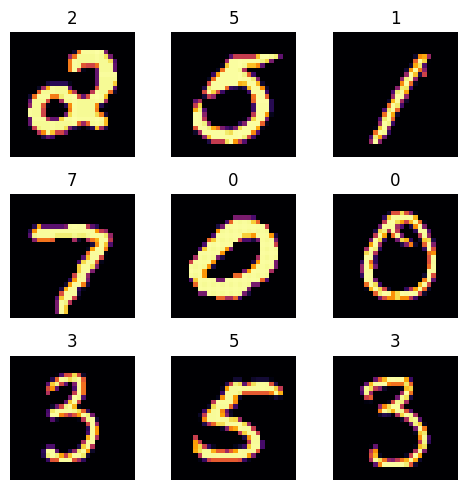

In [4]:
fig,ax = plt.subplots(3,3,figsize=(5,5))

m,n = X.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.randint(m)
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X[k].shape[0]))
        ax[i,j].imshow(X[k].reshape((x,x)), cmap='inferno')
        ax[i,j].set_title(y[k])
        k += 1

plt.tight_layout()
plt.show()

**Firstly we use softmax for the output layer to test accuracy:**

In [7]:
shape_init = tf.keras.Input(shape=(len(X[0]),))

model = Sequential([shape_init,
                    Dense(units=50, activation='relu'),
                    Dense(units=35, activation='relu'),
                    Dense(units=10, activation='softmax')],
                    name='Multi_Class_Classification'
                    )

In [8]:
model.summary()

Model: "Multi_Class_Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                39250     
                                                                 
 dense_4 (Dense)             (None, 35)                1785      
                                                                 
 dense_5 (Dense)             (None, 10)                360       
                                                                 
Total params: 41,395
Trainable params: 41,395
Non-trainable params: 0
_________________________________________________________________


In [9]:
layer1,layer2,layer3 = model.layers

In [11]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(0.0002))

In [12]:
model.fit(X,y,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 3.8810
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7315
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4847
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3556
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2341
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2042
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1777
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1587
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1430
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1316
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1170
E

In [23]:
prediction = model.predict(X_test[:20])

for i in range(len(prediction)):
    ip = np.where(prediction[i] == max(prediction[i]))
    print(f'Prediction: {ip[0][0]}   Actual value: {y_test[i]}')

1/1 [==============================] - 0s 23ms/step
Prediction: 7   Actual value: 7
Prediction: 2   Actual value: 2
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 4   Actual value: 4
Prediction: 1   Actual value: 1
Prediction: 4   Actual value: 4
Prediction: 9   Actual value: 9
Prediction: 6   Actual value: 5
Prediction: 9   Actual value: 9
Prediction: 0   Actual value: 0
Prediction: 6   Actual value: 6
Prediction: 9   Actual value: 9
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 5   Actual value: 5
Prediction: 9   Actual value: 9
Prediction: 7   Actual value: 7
Prediction: 3   Actual value: 3
Prediction: 4   Actual value: 4


In [28]:
y_pred = model.predict(X_test)
y_pred_th = np.zeros(len(y_pred))

ip_list = []

for i in range(len(y_pred)):
    ip = np.where(y_pred[i] == max(y_pred[i]))
    ip_list.append(ip[0])

313/313 [==============================] - 1s 2ms/step


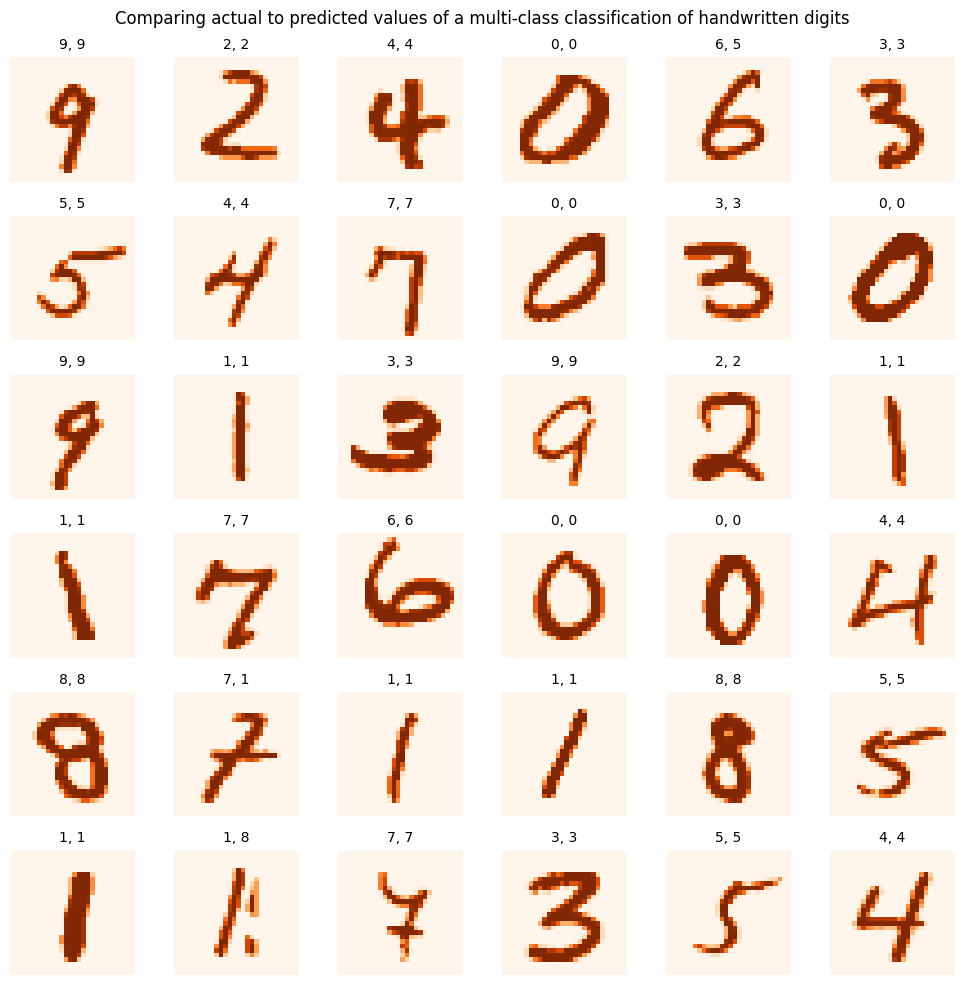

In [41]:
fig,ax = plt.subplots(6,6,figsize=(10,10))

m,n = X_test.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.randint(m)
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X_test[k].shape[0]))
        ax[i,j].imshow(X_test[k].reshape((x,x)), cmap='Oranges')
        ax[i,j].set_title(r'%i, %i'%(y_test[k], ip_list[k]), fontsize=10)

fig.suptitle('Comparing actual to predicted values of a multi-class classification of handwritten digits')
plt.tight_layout()
plt.show()

There are 410 element(s) with different prediction. The precision is of 95.9000%. Let us plot some of them:


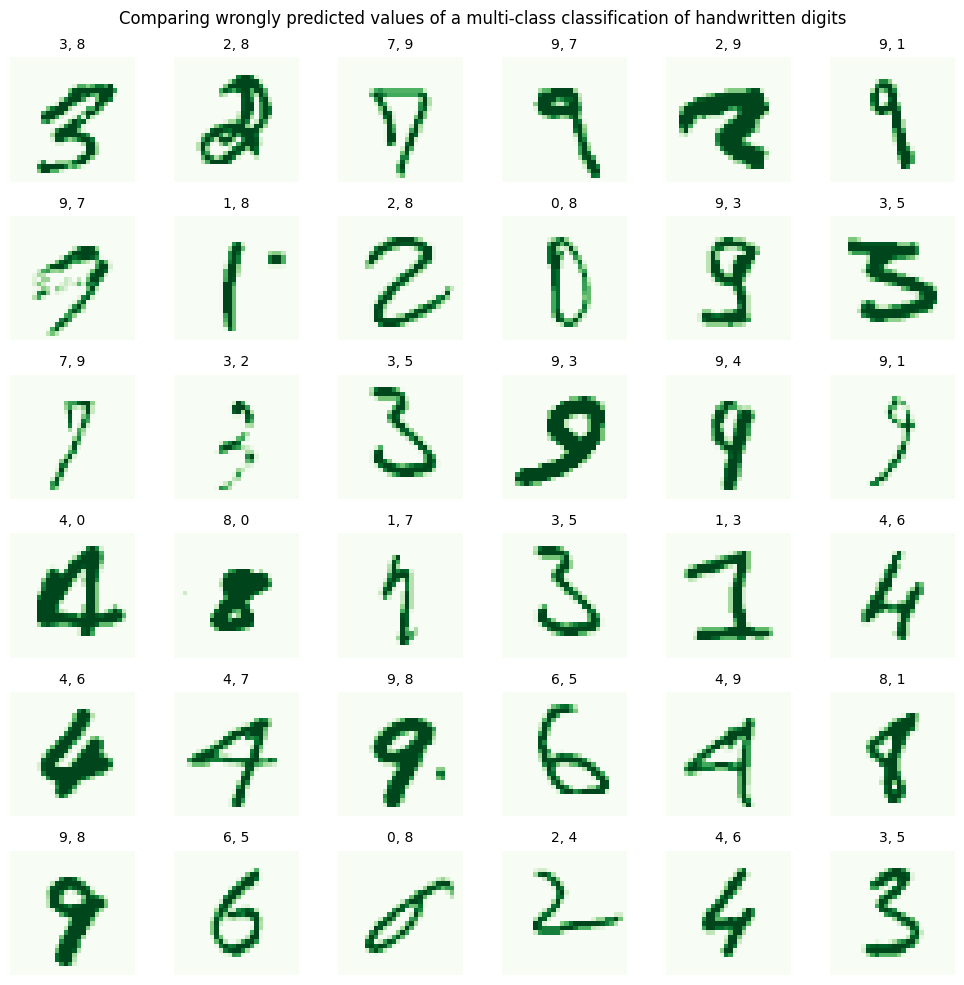

In [62]:
ip_array = np.array(ip_list).T[0]

iy_results = np.where(y_test != ip_array)[0]

print('There are %i element(s) with different prediction. The precision is of %.4f%%. Let us plot some of them:'%(len(iy_results), 100-len(iy_results)/len(y_test)*100))

fig,ax = plt.subplots(6,6,figsize=(10,10))

m,n = X_test.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.choice(iy_results.shape[0])
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X_test[iy_results[k]].shape[0]))
        ax[i,j].imshow(X_test[iy_results[k]].reshape((x,x)), cmap='Greens')
        ax[i,j].set_title(r'%i, %i'%(y_test[iy_results[k]], ip_list[iy_results[k]]), fontsize=10)

fig.suptitle('Comparing wrongly predicted values of a multi-class classification of handwritten digits')
plt.tight_layout()
plt.show()

**Now I use a linear activation function for the output layer instead:**

In [101]:
(X,y),(X_test,y_test)  = tf.keras.datasets.mnist.load_data('mnist.npz')

In [102]:
X = X.reshape(-1,X[0].shape[0]*X[0].shape[1])
X_test = X_test.reshape(-1,X_test[0].shape[0]*X_test[0].shape[1])

In [103]:
shape_init = tf.keras.Input(shape=(len(X[0]),))

model = Sequential([shape_init,
                    Dense(units=50, activation='relu'),
                    Dense(units=35, activation='relu'),
                    Dense(units=10, activation='linear')],
                    name='Multi_Class_Classification_linear_softmax'
                    )

In [104]:
model.summary()

Model: "Multi_Class_Classification_linear_softmax"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dense_13 (Dense)            (None, 35)                1785      
                                                                 
 dense_14 (Dense)            (None, 10)                360       
                                                                 
Total params: 41,395
Trainable params: 41,395
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(0.001))

In [106]:
model.fit(X,y,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6849
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3538
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2650
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2223
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1944
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1729
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1591
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1460
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1371
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1295
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1226
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1186
E

In [107]:
prediction = model.predict(X_test[:20])

for i in range(len(prediction)):
    ip = np.where(prediction[i] == max(prediction[i]))
    print(f'Prediction: {ip[0][0]}   Actual value: {y_test[i]}')

1/1 [==============================] - 0s 117ms/step
Prediction: 7   Actual value: 7
Prediction: 2   Actual value: 2
Prediction: 1   Actual value: 1
Prediction: 0   Actual value: 0
Prediction: 4   Actual value: 4
Prediction: 1   Actual value: 1
Prediction: 4   Actual value: 4
Prediction: 9   Actual value: 9
Prediction: 5   Actual value: 5
Prediction: 9   Actual value: 9
Prediction: 0   Actual value: 0
Prediction: 6   Actual value: 6
Prediction: 9   Actual value: 9
Prediction: 0   Actual value: 0
Prediction: 1   Actual value: 1
Prediction: 5   Actual value: 5
Prediction: 9   Actual value: 9
Prediction: 7   Actual value: 7
Prediction: 3   Actual value: 3
Prediction: 4   Actual value: 4


In [108]:
y_pred = model.predict(X_test)
y_pred_th = np.zeros(len(y_pred))

ip_list = []

for i in range(len(y_pred)):
    ip = np.where(y_pred[i] == max(y_pred[i]))
    ip_list.append(ip[0])

313/313 [==============================] - 0s 1ms/step


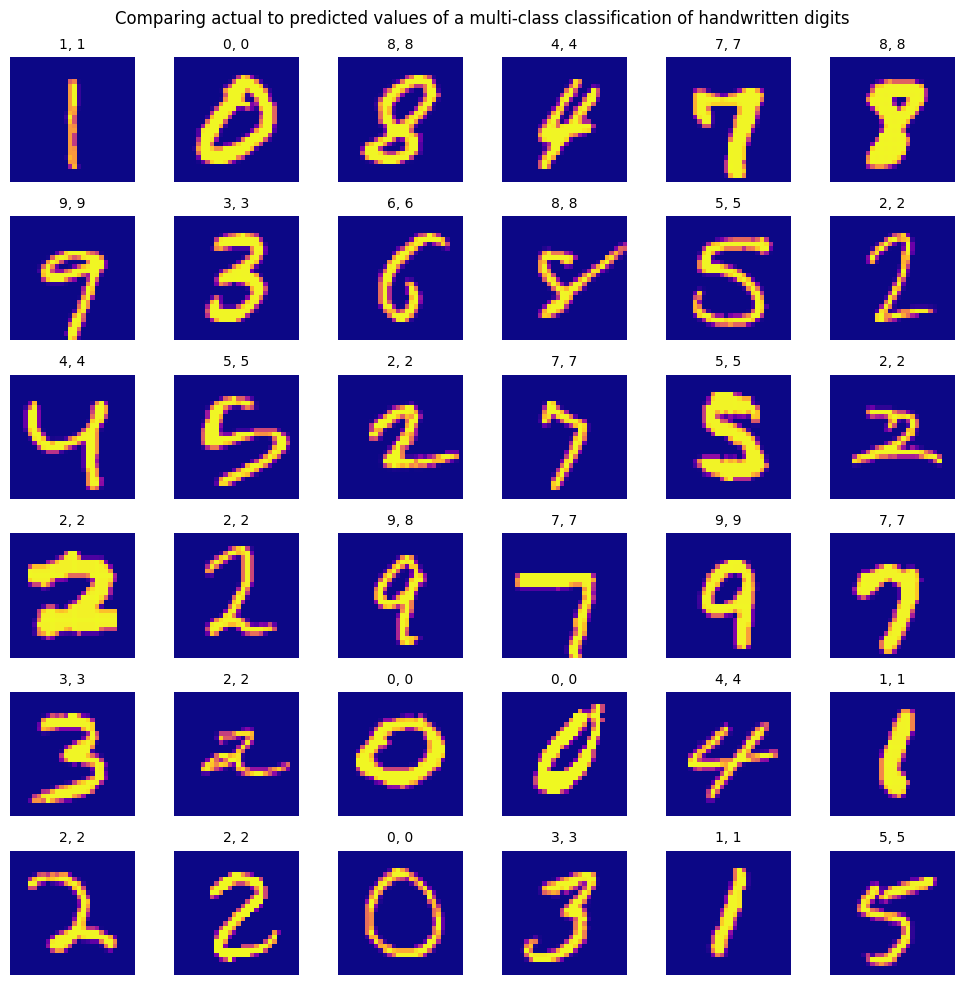

In [109]:
fig,ax = plt.subplots(6,6,figsize=(10,10))

m,n = X_test.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.randint(m)
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X_test[k].shape[0]))
        ax[i,j].imshow(X_test[k].reshape((x,x)), cmap='plasma')
        ax[i,j].set_title(r'%i, %i'%(y_test[k], ip_list[k]), fontsize=10)

fig.suptitle('Comparing actual to predicted values of a multi-class classification of handwritten digits')
plt.tight_layout()
plt.show()

There are 383 element(s) with different prediction. The precision is of 96.1700%. Let us plot some of them:


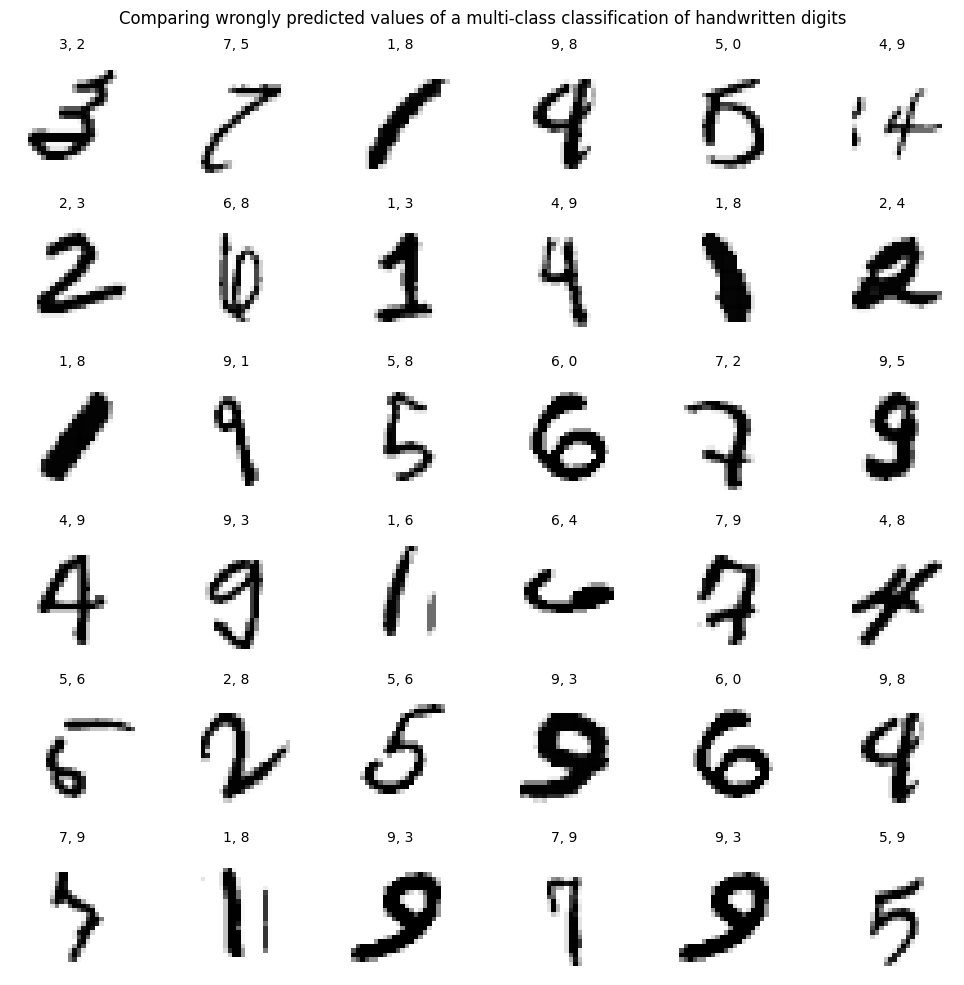

In [110]:
ip_array = np.array(ip_list).T[0]

iy_results = np.where(y_test != ip_array)[0]

print('There are %i element(s) with different prediction. The precision is of %.4f%%. Let us plot some of them:'%(len(iy_results), 100-len(iy_results)/len(y_test)*100))

fig,ax = plt.subplots(6,6,figsize=(10,10))

m,n = X_test.shape

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        k = np.random.choice(iy_results.shape[0])
        ax[i,j].set_axis_off()
        x = int(np.sqrt(X_test[iy_results[k]].shape[0]))
        ax[i,j].imshow(X_test[iy_results[k]].reshape((x,x)), cmap='Greys')
        ax[i,j].set_title(r'%i, %i'%(y_test[iy_results[k]], ip_list[iy_results[k]]), fontsize=10)

fig.suptitle('Comparing wrongly predicted values of a multi-class classification of handwritten digits')
plt.tight_layout()
plt.show()